# Linear Models

1. What Linear Regression training algorithm can you use if you have a training set with millions of
features?

The best algorithms are Stochastic Gradient Descent and Mini-batch Gradient Descent. Batch Gradient Descent also can be used, but Normal Equations are definitely much slowler. 

2. Suppose the features in your training set have very different scales. What algorithms might suffer
from this, and how? What can you do about it?

Batch Gradient Descent is the most sensitive to non-scaled features. Mini-Batch Gradient Descent also perceptibly suffers from it. And only Normal Equations work without scaling. 

3. Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?`

4. Do all Gradient Descent algorithms lead to the same model provided you let them run long
enough?

No. As a result of many times Batch Gradient Descent is implemented, we get closer to the minimum with every iteration. Stochastic and Mini-batch Gradient Descent continue to work around the local minimum but actually every next iteration result doesn't approache it.

5. Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you
notice that the validation error consistently goes up, what is likely going on? How can you fix
this?

If training error decreases it may mean that the model is overfitted. If training error also goes up then problem can be fixed by decreasing learning rate.

6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error
goes up?

No, because it doesn't mean that it will not go down after a definite amount of iterations. But if it continues to grow, we can back up to minimal validation error.

7. Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the
optimal solution the fastest? Which will actually converge? How can you make the others
converge as well?

SGD. It will be near the solution faster than other algorithms. Actually it doesn't converge (neither Mini-batch), but BGD does. We can make SGD and Mini-batch converge by increasing their learning rate.

*8. Suppose you are using Polynomial Regression. You plot the learning curves and you notice that
there is a large gap between the training error and the validation error. What is happening? What
are three ways to solve this?

Гt looks like the model has been overfitted. To solve the problem we can try another regularization, increase polynom degree, use the algorithm with randomly generated values, repeating while we can estimate the probability of obtaining equal or better results in a random way.

*9. Suppose you are using Ridge Regression and you notice that the training error and the validation
error are almost equal and fairly high. Would you say that the model suffers from high bias or
high variance? Should you increase the regularization hyperparameter α or reduce it?

Гt looks like the model has been underfitted. That means it suffers from high bias. Then, reducing the regularization hyperparameter α can be helpful. 

*10. Why would you want to use:
- Ridge Regression instead of Linear Regression?
- Lasso instead of Ridge Regression?
- Elastic Net instead of Lasso?

1. Ridge Regression provides regularization so in most cases the result is more accurate.
2. Sometimes Lasso can make some weigths go to zero so it can decrease amount of using features.
3. Lasso variable selection can be too dependent on data and thus unstable

*11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you
implement two Logistic Regression classifiers or one Softmax Regression classifier?

Softmax Regression classifier is usually used when there are more than two independent classes. But since they intersect? we should use two Logistic Regression classifiers.

***12. Try to apply any linear model you have already known to a real dataset. Choose simple vanilla accuracy for classification or mean square error for regression as your control metric. Try to analyse results and interpret them. Choose the best algorithm and features as well.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, validation_curve, learning_curve
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

%matplotlib inline

In [16]:
df = pd.read_csv('ptrain.csv',sep = ',')
pd.set_option('display.max_columns', 50)
df = df.fillna(0)
df

,TP_CHANGES_NUM,PORTED_IN,OBLIG_NUM,OBLIG_ON_START,DEVICE_TYPE_BUS,REFILL_OCT_16,REFILL_NOV_16,OUTGOING_OCT_16,OUTGOING_NOV_16,GPRS_OCT_16,GPRS_NOV_16,REVENUE_OCT_16,REVENUE_NOV_16,ACTIVITY_DEC_16,AGE,DURATION_M,ACTIVE,WEAKLY_ACTIVE,INACTIVE,LOG_TP_CHANGES_NUM,FEMALE,MALE,L_OFFER_START_PACK,L_MLLS_STATE,TP_ACTIVE,TP_WEAKLY_ACTIVE,TP_INACTIVE,DEVICE_MATCH,COUNTRYSIDE,LOCAL_TOWNS,MINSK,MIX,REGIONAL_CITIES,UNDEFINED,MODEM_A_T_LAST,OTHER_A_T_LAST,SMARTPHOME_A_T_L
0,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00,0,28,52,0.0,1.0,0.0,2.995732,0.0,1.0,0,3,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,20.0,0.0,0.0,0.0,1,15.0,821.266667,337.433333,821.266667,2319.0,2896.0,14.171355,9.75,1,32,35,1.0,0.0,0.0,0.000000,0.0,1.0,2,0,1.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1,18.0,145.466667,396.033333,145.466667,80369.0,15803.0,16.170000,10.74,1,20,15,1.0,0.0,0.0,0.000000,0.0,1.0,1,0,1.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1,10.0,306.283333,234.900000,306.283333,1155.0,1695.0,8.780000,9.42,1,35,50,1.0,0.0,0.0,0.000000,0.0,1.0,2,3,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00,0,25,43,0.0,1.0,0.0,0.000000,1.0,0.0,0,0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29203,0.0,0.0,1.0,1.0,0,10.0,0.000000,0.000000,0.000000,7190.0,6476.0,9.900000,9.90,1,34,6,1.0,0.0,0.0,0.000000,1.0,0.0,1,3,0.0,1.0,0.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
29204,1.0,0.0,0.0,0.0,1,6.0,138.083333,174.416667,138.083333,542.0,370.0,6.100000,0.00,1,38,21,0.0,0.0,1.0,0.000000,0.0,1.0,2,3,1.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29205,0.0,0.0,1.0,1.0,1,19.0,80.100000,67.183333,80.100000,6423.0,9195.0,19.180000,14.87,1,37,22,1.0,0.0,0.0,0.000000,0.0,1.0,2,3,0.0,1.0,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
29206,0.0,0.0,0.0,0.0,1,0.0,166.583333,61.000000,166.583333,167.0,488.0,0.000000,13.50,1,21,3,0.0,0.0,1.0,0.000000,0.0,1.0,1,3,1.0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [17]:
y = df['ACTIVITY_DEC_16']
df.drop(['ACTIVITY_DEC_16'], axis=1, inplace=True)
X = df.copy()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
from sklearn.linear_model import ElasticNet, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
pr = elastic_net.predict(X_test)
mean_squared_error(y_test, pr)


0.07940739220120636

In [30]:
lm_elastic_pipe = Pipeline([('scaler', StandardScaler()), ('lm_elastic', ElasticNet())])
lm_elastic_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lm_elastic',
                 ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                            l1_ratio=0.5, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

In [33]:
ridge = Ridge(alpha=0.1, random_state=42)
ridge.fit(X_train, y_train)
pr = ridge.predict(X_test)
mean_squared_error(y_test, pr)


R2 for ElasticNet Regression is -0.000


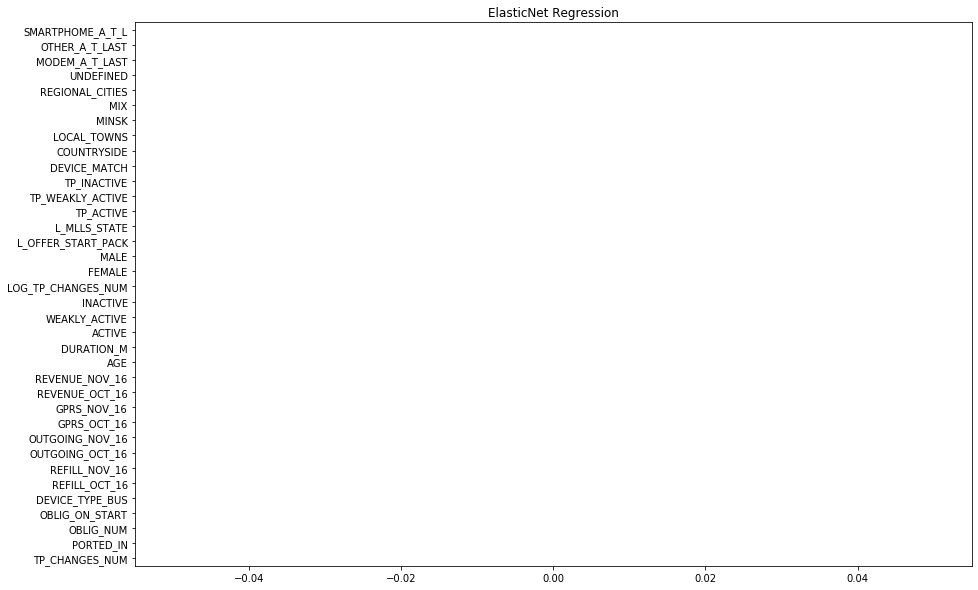

In [32]:
# Evaluate the model with ElasticNet regularization
plt.figure(figsize=(15, 10))
ft_importances_lm_elastic = pd.Series(lm_elastic_pipe['lm_elastic'].coef_, index=X.columns)
ft_importances_lm_elastic.plot(kind='barh', title='ElasticNet Regression')
plt.show();